In [2]:
import sys
sys.executable

'/Users/mikayla/.pyenv/versions/3.13.5/bin/python'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ctgan import CTGAN

In [4]:
with open('elements.json') as f:
    elements = json.load(f)

In [5]:
# using chat here to flatten my electron configuration dictionary
for el in elements:
    ec = el.get('electronConfiguration', {})
    el['electronConfigurationCore'] = ec.get('core', None)
    el['electronConfigurationDisplay'] = ec.get('display', None)

In [6]:
data = pd.DataFrame(elements)

In [7]:
data.head()

,symbol,name,atomicNumber,atomicMass,electronegativity,standardState,group,period,groupBlock,atomicRadius,electronConfiguration,meltingPoint,boilingPoint,density,yearDiscovered,slug,electronConfigurationCore,electronConfigurationDisplay
0,H,Hydrogen,1,1.007800,2.20,gas,1,1,nonmetal,120,"{'orbitals': [{'level': 1, 'subshell': 's', 'e...",13.81,20.28,0.000090,1766,hydrogen,None,1s¹
1,He,Helium,2,4.002600,0.00,gas,18,1,noble gas,140,"{'orbitals': [{'level': 1, 'subshell': 's', 'e...",0.95,4.22,0.000179,1868,helium,None,1s²
2,Li,Lithium,3,7.000000,0.98,solid,1,2,alkali metal,182,"{'core': 'He', 'orbitals': [{'level': 2, 'subs...",453.65,1615.00,0.534000,1817,lithium,He,[He]2s¹
3,Be,Beryllium,4,9.012183,1.57,solid,2,2,alkaline earth metal,153,"{'core': 'He', 'orbitals': [{'level': 2, 'subs...",1560.00,2744.00,1.850000,1798,beryllium,He,[He]2s²
4,B,Boron,5,10.810000,2.04,solid,13,2,metalloid,192,"{'core': 'He', 'orbitals': [{'level': 2, 'subs...",2348.00,4273.00,2.370000,1808,boron,He,[He]2s² 2p¹


In [8]:
newOrder = ['symbol', 'name', 'slug', 'atomicNumber', 'group', 'period', 'groupBlock', 'yearDiscovered',
            'electronConfiguration', 'electronConfigurationCore', 'electronConfigurationDisplay',
            'standardState', 'atomicMass', 'electronegativity', 'atomicRadius', 'meltingPoint', 'boilingPoint',
            'density']
data = data[newOrder]

In [9]:
data.head()

,symbol,name,slug,atomicNumber,group,period,groupBlock,yearDiscovered,electronConfiguration,electronConfigurationCore,electronConfigurationDisplay,standardState,atomicMass,electronegativity,atomicRadius,meltingPoint,boilingPoint,density
0,H,Hydrogen,hydrogen,1,1,1,nonmetal,1766,"{'orbitals': [{'level': 1, 'subshell': 's', 'e...",None,1s¹,gas,1.007800,2.20,120,13.81,20.28,0.000090
1,He,Helium,helium,2,18,1,noble gas,1868,"{'orbitals': [{'level': 1, 'subshell': 's', 'e...",None,1s²,gas,4.002600,0.00,140,0.95,4.22,0.000179
2,Li,Lithium,lithium,3,1,2,alkali metal,1817,"{'core': 'He', 'orbitals': [{'level': 2, 'subs...",He,[He]2s¹,solid,7.000000,0.98,182,453.65,1615.00,0.534000
3,Be,Beryllium,beryllium,4,2,2,alkaline earth metal,1798,"{'core': 'He', 'orbitals': [{'level': 2, 'subs...",He,[He]2s²,solid,9.012183,1.57,153,1560.00,2744.00,1.850000
4,B,Boron,boron,5,13,2,metalloid,1808,"{'core': 'He', 'orbitals': [{'level': 2, 'subs...",He,[He]2s² 2p¹,solid,10.810000,2.04,192,2348.00,4273.00,2.370000


In [10]:
data.to_csv('elements.csv')

In [11]:
# attempting out the tabgan on the elements
dataset = pd.read_csv('cleanElements.csv')
dataset.head()

,symbol,name,slug,atomicNumber,group,period,groupBlock,yearDiscovered,electronConfigurationCore,electronConfigurationDisplay,standardState,atomicMass,electronegativity,atomicRadius,meltingPoint,boilingPoint,density,isAncient
0,H,Hydrogen,hydrogen,1,1,1,nonmetal,1766,NaN,1s¹,gas,1.007800,2.20,120,13.81,20.28,0.000090,False
1,He,Helium,helium,2,18,1,noble gas,1868,NaN,1s²,gas,4.002600,0.00,140,0.95,4.22,0.000179,False
2,Li,Lithium,lithium,3,1,2,alkali metal,1817,He,[He]2s¹,solid,7.000000,0.98,182,453.65,1615.00,0.534000,False
3,Be,Beryllium,beryllium,4,2,2,alkaline earth metal,1798,He,[He]2s²,solid,9.012183,1.57,153,1560.00,2744.00,1.850000,False
4,B,Boron,boron,5,13,2,metalloid,1808,He,[He]2s² 2p¹,solid,10.810000,2.04,192,2348.00,4273.00,2.370000,False


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   symbol                        98 non-null     object 
 1   name                          98 non-null     object 
 2   slug                          98 non-null     object 
 3   atomicNumber                  98 non-null     int64  
 4   group                         98 non-null     int64  
 5   period                        98 non-null     int64  
 6   groupBlock                    98 non-null     object 
 7   yearDiscovered                98 non-null     int64  
 8   electronConfigurationCore     96 non-null     object 
 9   electronConfigurationDisplay  98 non-null     object 
 10  standardState                 98 non-null     object 
 11  atomicMass                    98 non-null     float64
 12  electronegativity             98 non-null     float64
 13  atomicR

In [13]:
dataset.shape

(98, 18)

In [14]:
dataset.duplicated().sum()

np.int64(0)

In [15]:
numeric = dataset.select_dtypes('number')
numeric = numeric.drop(['atomicNumber'], axis=1)
numeric.head()

,group,period,yearDiscovered,atomicMass,electronegativity,atomicRadius,meltingPoint,boilingPoint,density
0,1,1,1766,1.007800,2.20,120,13.81,20.28,0.000090
1,18,1,1868,4.002600,0.00,140,0.95,4.22,0.000179
2,1,2,1817,7.000000,0.98,182,453.65,1615.00,0.534000
3,2,2,1798,9.012183,1.57,153,1560.00,2744.00,1.850000
4,13,2,1808,10.810000,2.04,192,2348.00,4273.00,2.370000


In [16]:
numeric.describe()

,group,period,yearDiscovered,atomicMass,electronegativity,atomicRadius,meltingPoint,boilingPoint,density
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,9.938776,4.897959,1199.714286,120.190845,1.660204,209.102041,1266.962010,2513.733265,7.632123
std,5.368515,1.549791,1651.963312,74.461073,0.716624,38.597444,907.201477,1579.742399,5.890300
min,1.000000,1.000000,-3000.000000,1.007800,0.000000,120.000000,0.950000,4.220000,0.000090
25%,5.250000,4.000000,1775.000000,55.163530,1.205000,187.000000,496.507500,1162.000000,2.520000
50%,10.000000,5.000000,1814.000000,116.764000,1.605000,209.000000,1197.500000,2768.000000,7.072000
75%,14.750000,6.000000,1885.750000,183.116975,2.145000,230.500000,1808.750000,3603.500000,10.425750
max,18.000000,7.000000,1950.000000,251.079590,3.980000,348.000000,3823.000000,5869.000000,22.570000


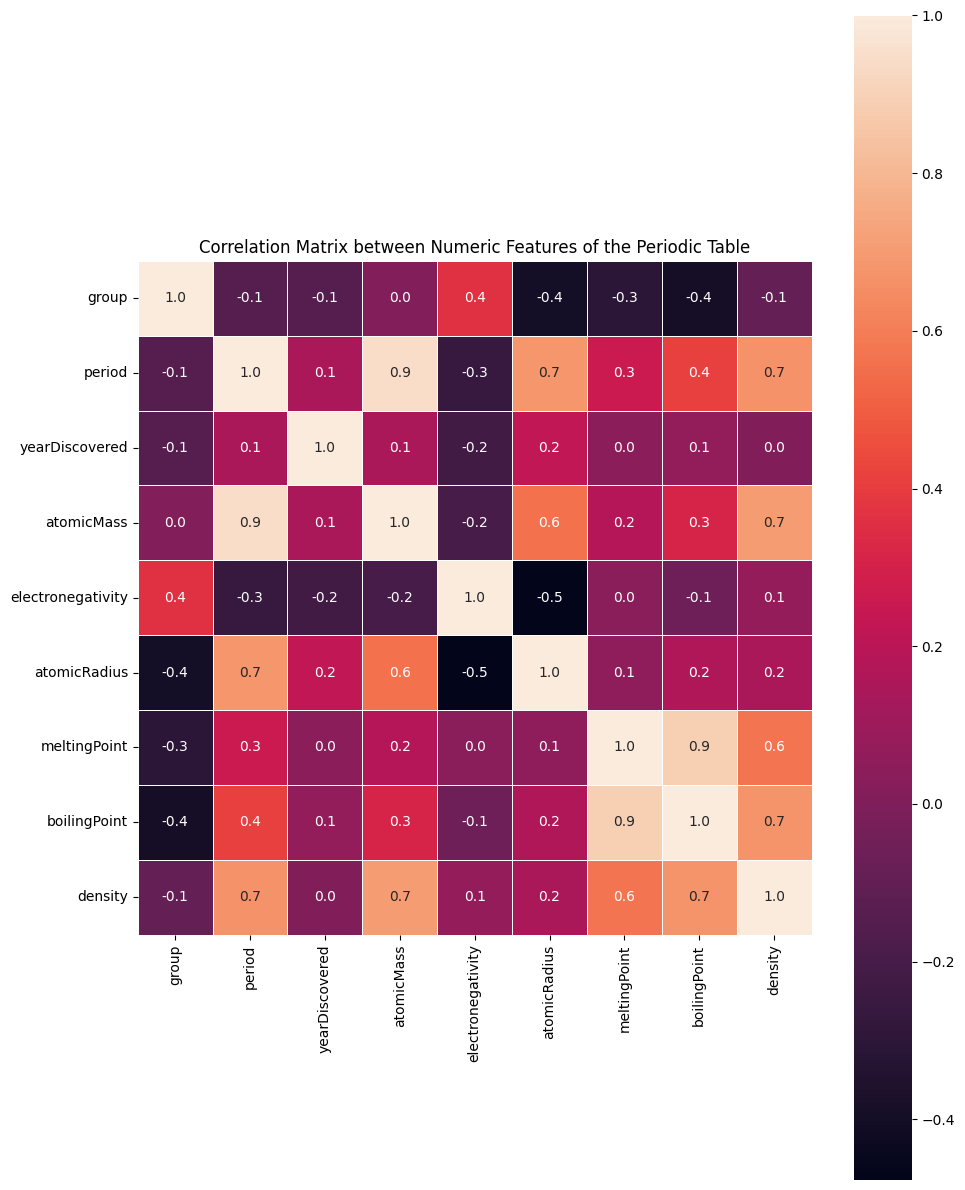

In [17]:
cm = numeric.corr()
plt.figure(figsize=(10, 12))
sns.heatmap(cm, annot=True, fmt='.1f', square=True, linewidths=0.5)
plt.title('Correlation Matrix between Numeric Features of the Periodic Table')
plt.tight_layout()
plt.show()

test - it should work but would be really interesting if it didn't. does the group column and encoded groupBlock column correlate

In [18]:
dataset.head()

,symbol,name,slug,atomicNumber,group,period,groupBlock,yearDiscovered,electronConfigurationCore,electronConfigurationDisplay,standardState,atomicMass,electronegativity,atomicRadius,meltingPoint,boilingPoint,density,isAncient
0,H,Hydrogen,hydrogen,1,1,1,nonmetal,1766,NaN,1s¹,gas,1.007800,2.20,120,13.81,20.28,0.000090,False
1,He,Helium,helium,2,18,1,noble gas,1868,NaN,1s²,gas,4.002600,0.00,140,0.95,4.22,0.000179,False
2,Li,Lithium,lithium,3,1,2,alkali metal,1817,He,[He]2s¹,solid,7.000000,0.98,182,453.65,1615.00,0.534000,False
3,Be,Beryllium,beryllium,4,2,2,alkaline earth metal,1798,He,[He]2s²,solid,9.012183,1.57,153,1560.00,2744.00,1.850000,False
4,B,Boron,boron,5,13,2,metalloid,1808,He,[He]2s² 2p¹,solid,10.810000,2.04,192,2348.00,4273.00,2.370000,False


In [19]:
unique = dataset['groupBlock'].unique()
print(sorted(unique))

['actinide', 'alkali metal', 'alkaline earth metal', 'halogen', 'lanthanide', 'metalloid', 'noble gas', 'nonmetal', 'post-transition metal', 'transition metal']


In [20]:
ohe_groupBlock = pd.get_dummies(dataset['groupBlock'])

In [21]:
numeric = pd.concat([numeric, ohe_groupBlock], axis='columns')
numeric.head()

,group,period,yearDiscovered,atomicMass,electronegativity,atomicRadius,meltingPoint,boilingPoint,density,actinide,alkali metal,alkaline earth metal,halogen,lanthanide,metalloid,noble gas,nonmetal,post-transition metal,transition metal
0,1,1,1766,1.007800,2.20,120,13.81,20.28,0.000090,False,False,False,False,False,False,False,True,False,False
1,18,1,1868,4.002600,0.00,140,0.95,4.22,0.000179,False,False,False,False,False,False,True,False,False,False
2,1,2,1817,7.000000,0.98,182,453.65,1615.00,0.534000,False,True,False,False,False,False,False,False,False,False
3,2,2,1798,9.012183,1.57,153,1560.00,2744.00,1.850000,False,False,True,False,False,False,False,False,False,False
4,13,2,1808,10.810000,2.04,192,2348.00,4273.00,2.370000,False,False,False,False,False,True,False,False,False,False


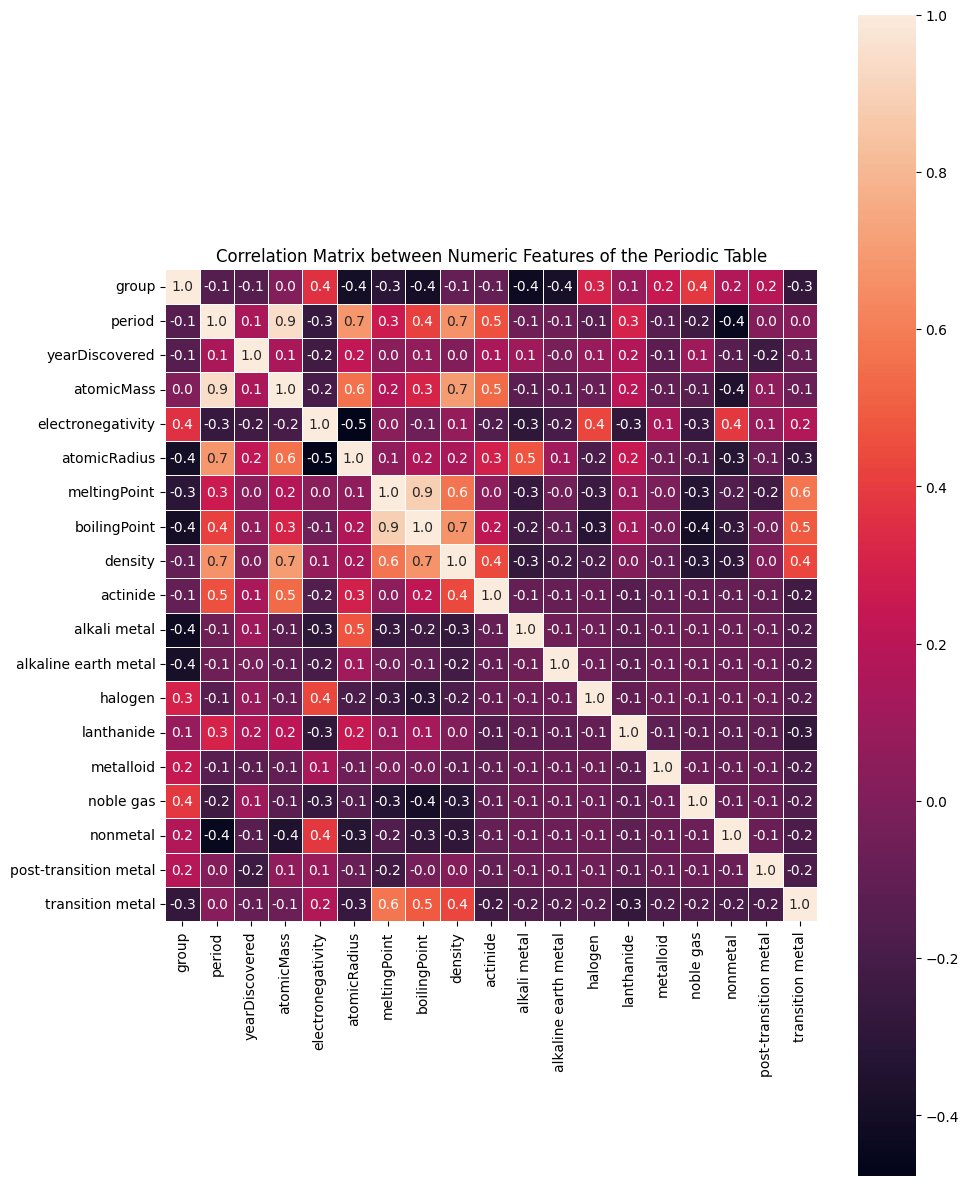

In [22]:
cm = numeric.corr()
plt.figure(figsize=(10, 12))
sns.heatmap(cm, annot=True, fmt='.1f', square=True, linewidths=0.5)
plt.title('Correlation Matrix between Numeric Features of the Periodic Table')
plt.tight_layout()
plt.show()

In [ ]:
catCols = dataset.select_dtypes(include=['object', 'boolean']).columns.tolist()

In [ ]:
ctgan = CTGAN(epochs=10)
ctgan.fit(dataset, catCols)

In [ ]:
syn = ctgan.sample(98)

In [ ]:
syn.head()